# 参考

- [いろいろな乱数生成](http://qiita.com/yubais/items/bf9ce0a8fefdcc0b0c97)

# 一様乱数

`numpy.random.rand()` で 0-1 の一様乱数を生成する.
引数を指定すれば複数の乱数を生成できる.
乱数の範囲を変えたい場合は後からベクトル演算する.

In [3]:
from numpy.random import *

print('0-1の乱数を1個生成')
print(rand())
print('')

print('0-1の乱数を100個生成')
print(rand(100))
print('')

print('0-1の乱数で 10x10 の行列を生成')
print(rand(10,10))
print('')

print('30-70の乱数を100個生成')
print(rand(100) * 40 + 30)

0-1の乱数を1個生成
0.4508252918750755

0-1の乱数を100個生成
[ 0.61488662  0.07760234  0.53138151  0.86782664  0.11375906  0.69320786
  0.43167391  0.19047453  0.52413956  0.54301813  0.79921488  0.45587628
  0.56753286  0.65512088  0.45928025  0.51290666  0.81377407  0.48251965
  0.8703395   0.389396    0.60032228  0.63397571  0.76667574  0.09487093
  0.51228139  0.32530226  0.574423    0.9861803   0.8300491   0.59533856
  0.24058177  0.73697314  0.15879775  0.78936671  0.84593599  0.7062261
  0.5628054   0.80813607  0.77523144  0.23075837  0.92041683  0.43712663
  0.66489241  0.87882431  0.42829379  0.28750934  0.49324296  0.35579788
  0.83327002  0.46165582  0.35018432  0.28336759  0.36716882  0.27313688
  0.74614733  0.58380508  0.56836499  0.65703475  0.32653421  0.67080177
  0.11252232  0.02195329  0.05187041  0.99792125  0.77646622  0.90161344
  0.61729186  0.19654732  0.45183838  0.38767172  0.75224859  0.8038915
  0.84481383  0.87122481  0.21002744  0.18330248  0.72808433  0.37059432
  0.198

# モンテカルロ法

半径 1 の四分円の面積を求めることで円周率を計算する.

まずは関数定義.

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def draw_quadrant():
    """四分円の円周を描画"""
    circle_x = np.arange(0,1,0.001)
    circle_y = np.sqrt(1- circle_x * circle_x)
    plt.plot(circle_x, circle_y)

def calculate_pi(N):
    """モンテカルロ法で円周率を近似計算する"""

    # 的に当たった階数
    X = 0

    # 試行時間 測定開始
    start_time = datetime.now()

    # 試行開始
    for i in range(1, N):
        score_x = np.random.rand()
        score_y = np.random.rand()
        if score_x * score_x + score_y * score_y < 1:
            # 的に入ったら赤
            plt.plot(score_x, score_y,"ro")
            X = X + 1
        else:
            # 的から外れたら青
            plt.plot(score_x, score_y,"bo")

        # pi の近似値計算
        pi = 4 * float(X) / float(N)

    # 試行時間 測定終了
    end_time = datetime.now()
    time = end_time - start_time

    print("time = {}".format(time))
    print("$\pi$ = {}".format(pi))

    # 描画
    draw_quadrant()
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

## 試行回数 100

time = 0:00:00.228966
$\pi$ = 3.28


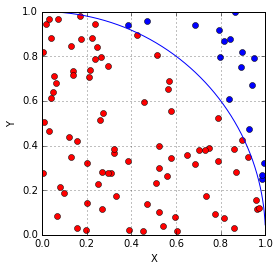

In [15]:
calculate_pi(100)

## 試行回数 1000

time = 0:00:01.447608
$\pi$ = 3.164


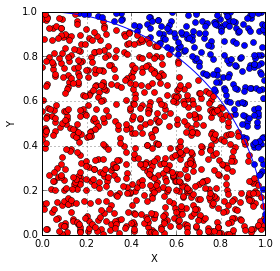

In [16]:
calculate_pi(1000)

## 試行回数 10000

time = 0:00:15.986382
$\pi$ = 3.1352


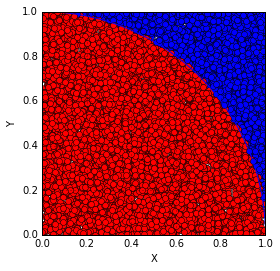

In [17]:
calculate_pi(10000)